## Predicting Boston Housing Prices

Ali K. Thabet
December, 2015

### Overview:
The aim of this project is to implement the ideas in Machine Learning related to model evaluation and validation. It is Project 1 in the Machine Learning Engineer Nanodegree. More specifically, we will use data related to housing prices in Boston in order to predict the best house price for a sample house. 

#### Import Statements:

In [12]:
# Load libraries
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

################################
### ADD EXTRA LIBRARIES HERE ###
################################
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import grid_search

%matplotlib inline

#### Load the Boston Housing data

In [2]:
def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()
    return boston

#### Compute and display some descriptive measures and statistics

In [25]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    print "Number of data points (houses):", len(housing_prices)
    # Number of features?
    print "Number of features:", len(housing_features[0])
    # Minimum price?
    print "Minimum house price:", np.min(housing_prices)
    # Maximum price?
    print "Maximum house price:", np.max(housing_prices)
    # Calculate mean price?
    print "Mean house price:", "%.2f" % np.mean(housing_prices)
    # Calculate median price?
    print "Median house price:", np.median(housing_prices)
    # Calculate standard deviation?
    print "Standard deviation of house prices:", "%.2f" % np.std(housing_prices)

#### Split the data for crossvalidation

In [4]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.7)

    return X_train, y_train, X_test, y_test

#### Performance metric:
We are estimating housing prices using regression. Scikit-learn provides different options for performing regression evaluation. These are summerized at http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics. The metric of choice is mean squared error.

In [5]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return mean_squared_error(label, prediction)

#### Learning and Model Complexity Curves

In [6]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""
        
    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)

In [7]:
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [9]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()

#### Prediction Model:
This is the prediction estimated using a decision tree regressor. We add the Grid Search capailities in order to estimate the best value for the tree maximum depth.

In [15]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, scoring='mean_squared_error')

    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y)

    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)

In [16]:
#### Estimating Boston House Prices

In [17]:
"""Analyze the Boston housing data. Evaluate and validate the
   performanance of a Decision Tree regressor on the housing data.
   Fine tune the model to make prediction on unseen data."""

# Load data
city_data = load_data()

### Questions:
####  Statistical Analysis and Data Exploration
* Number of data points (houses)?
* Number of features?
* Minimum and maximum housing prices?
* Mean and median Boston housing prices?
* Standard deviation?

In [26]:
# Explore the data
explore_city_data(city_data)

Number of data points (houses): 506
Number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.53
Median house price: 21.2
Standard deviation of house prices: 9.19


####  Evaluating Model Performance
* Which measure of model performance is best to use for predicting Boston housing data and analyzing the errors? Why do you think this measurement most appropriate? Why might the other measurements not be appropriate here?
* Why is it important to split the Boston housing data into training and testing data? What happens if you do not do this?
* What does grid search do and why might you want to use it?
* Why is cross validation useful and why might we use it with grid search?

In [27]:
# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

#### Analyzing Model Performance
* Look at all learning curve graphs provided. What is the general trend of training and testing error as training size increases?
* Look at the learning curves for the decision tree regressor with max depth 1 and 10 (first and last learning curve graphs). When the model is fully trained does it suffer from either high bias/underfitting or high variance/overfitting?
* Look at the model complexity graph. How do the training and test error relate to increasing model complexity? Based on this relationship, which model (max depth) best generalizes the dataset and why?

Decision Tree with Max Depth: 
1


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


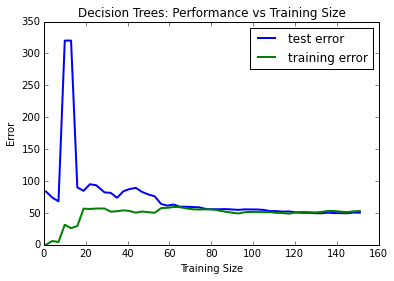

Decision Tree with Max Depth: 
2


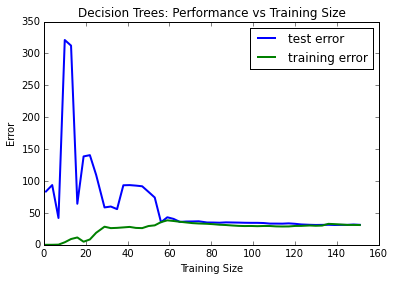

Decision Tree with Max Depth: 
3


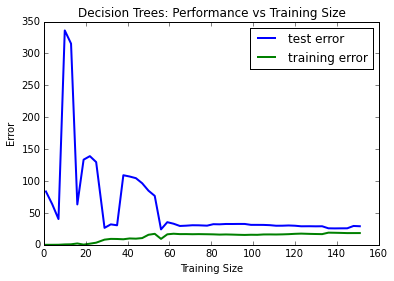

Decision Tree with Max Depth: 
4


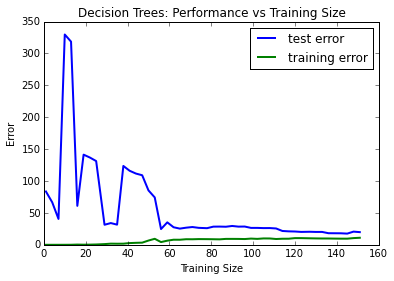

Decision Tree with Max Depth: 
5


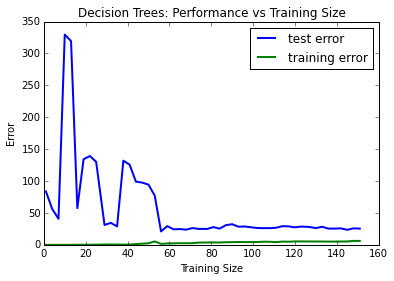

Decision Tree with Max Depth: 
6


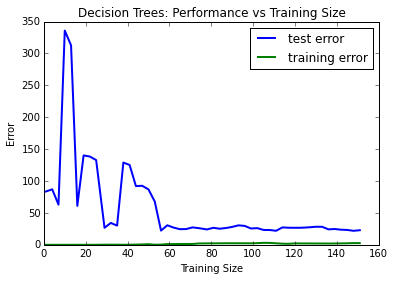

Decision Tree with Max Depth: 
7


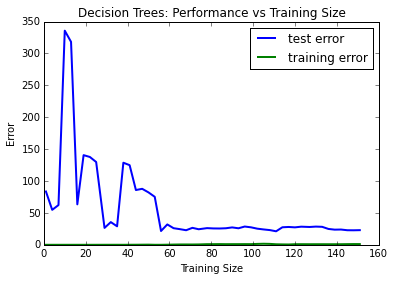

Decision Tree with Max Depth: 
8


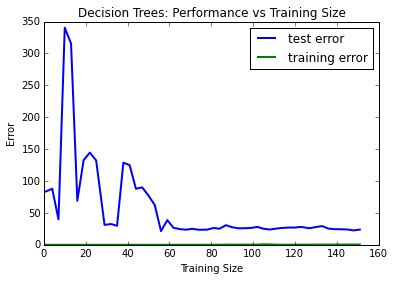

Decision Tree with Max Depth: 
9


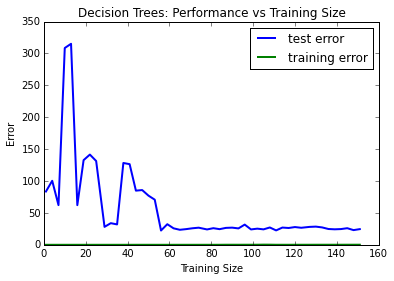

Decision Tree with Max Depth: 
10


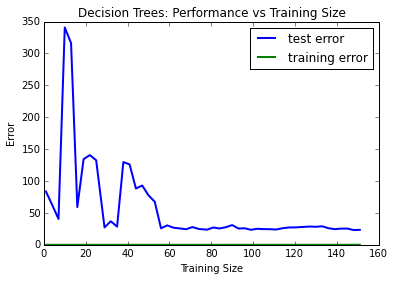

Model Complexity: 


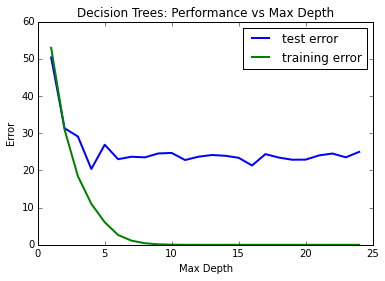

In [28]:
# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

#### Model Prediction
* Model makes predicted housing price with detailed model parameters (max depth) reported using grid search. Note due to the small randomization of the code it is recommended to run the program several times to identify the most common/reasonable price/model complexity.
* Compare prediction to earlier statistics and make a case if you think it is a valid model.

In [29]:
# Tune and predict Model
fit_predict_model(city_data)

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 21.62974359]
